<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>

<h1> Hackwagon Academy DS101 Lesson 7 </h1>
<h2>🐼 Data Analysis with Pandas 🐼</h2> 
<h3> Lesson Outline </h3>


- 1. [Pandas](#1)
    - 1.1 [Series](#1.1)
    - 1.2 [DataFrame](#1.2)
        - 1.2.1 [Manual Way](#1.2.1)
        - 1.2.2 [Pandas Way](#1.2.2)
    - 1.3 [Filtering](#1.3)
    - 1.4 [Statistical Operations](#1.4)
    - [Practice I](#P1)
    - 1.5 [Visualisation](#1.5)
        - 1.5.1 [Bar Chart](#1.5.1)
        - 1.5.2 [Line Chart](#1.5.2)
        - 1.5.3 [Scatter Plot](#1.5.3) 
    - [Practice II](#P2)
- 2. [Airbnb Dataset](#2)
- 3. [Practice III](#P3)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=25 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Pandas </font> </h2></a>

<i>"Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series."</i>

To know more about <b>pandas</b>, read the documentation here: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd

<a id="1.1"> <h3>1.1 DataFrame </h3></a>

A two-dimensional, tabular data structure with labeled axes (rows and columns), and is the **primary** pandas data structure. You can think of a `DataFrame` as a spreadsheet in Python.
A `DataFrame` is made up of multiple `Series` objects stuck together vertically and horizontally. <br>

<a id="1.1.1"> <h4>1.1.1 Manual Way </h4></a>

Using a combination of lists and dictionaries
#### List of Lists

In [5]:
data = [
    ['Alex', 20, 1050],
    ['Bob', 52, 1400],
    ['Cat', 23, 1690]
]

# Write your code below:
df = pd.DataFrame(data, columns=["name", "age", "salary"])
df.head()

,name,age,salary
0,Alex,20,1050
1,Bob,52,1400
2,Cat,23,1690


#### List of Dictionaries

In [8]:
data = [
    {'name': 'Alex', 'age': 20, 'salary': 1050},
    {'name': 'Bob', 'age': 52, 'salary': 1400},
    {'name': 'Cat', 'age': 23, 'salary': 1690}
]

# Write your code below:
df = pd.DataFrame(data)
df.head()

,name,age,salary
0,Alex,20,1050
1,Bob,52,1400
2,Cat,23,1690


<a id="1.1.2"> <h4>1.2.2 From Dataset </h4></a>

With `pandas`, opening a file is simply just using the `.read_csv()` function. Download the <b>Graduates dataset</b> from elearn `"graduates-from-university-first-degree-courses-by-type-of-course_CLEAN.csv"`.

```python
pd.read_csv("filename.csv")
```

In [10]:
# Write your code below:
df = pd.read_csv("graduates-from-university-first-degree-courses-by-type-of-course_CLEAN.csv")
print(df.shape)
df.head()

(660, 4)


,year,sex,type_of_course,no_of_graduates
0,1993,Males,Education,0
1,1993,Males,Applied Arts,0
2,1993,Males,Humanities & Social Sciences,481
3,1993,Males,Mass Communication,0
4,1993,Males,Accountancy,295


<a id="1.2"> <h3>1.2 Series </h3></a>

A `Series` == Row / Column of a `Dataframe`

- Extracting a column from a `Dataframe` is very similar to accessing data in a `dictionary`. 

In [19]:
numbers = [20,10,30,40]

# Write your code below:
s = pd.Series(numbers)
print(s)

print(numbers)
print(sorted(numbers))

print(s)
print(s.sort_values())

0    20
1    10
2    30
3    40
dtype: int64
[20, 10, 30, 40]
[10, 20, 30, 40]
0    20
1    10
2    30
3    40
dtype: int64
1    10
0    20
2    30
3    40
dtype: int64


#### Extracting a row (Series) from a DataFrame

We can extract a row using the `.iloc[]` function where in the `[]` is the row number.

In [12]:
# Write your code below:
df.iloc[0]

year                    1993
sex                    Males
type_of_course     Education
no_of_graduates            0
Name: 0, dtype: object

#### Extracting a column (Series) from a DataFrame

We can extract a column in a `DataFrame` by just calling the column header, similar to a dictionary. 

In [20]:
# Write your code below:
df["no_of_graduates"]

0         0
1         0
2       481
3         0
4       295
       ... 
655     309
656     289
657     258
658    1251
659     219
Name: no_of_graduates, Length: 660, dtype: int64

<a id="1.3"> <h3>1.3 Filtering </h3></a>

We can filter for results within a `DataFrame` to get the data we want. 

We specify the column we want to isolate in the DataFrame, then specify the boolean condition we are looking for. For example, we want to find the `Females` in the `Sex` column. 

```python
df['sex'] == 'Females'

# or for multiple conditions, we link them by & (and) or | (or) symbols
# where each condition is surrounded by a ()

(df['sex'] == 'Females') & (df['type_of_course'] == 'Medicine')

```

This gives us a Boolean Series of multiple `True` and `False` values. 

In [22]:
#(df['sex'] == 'Females') | (df['type_of_course'] == 'Medicine')

# Write your code below:
df['sex'] == 'Females'
(df['sex'] == 'Females') & (df['type_of_course'] == 'Medicine')

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

We put this Boolean Series inside another `[]` to take out the data within the DataFrame. What this does is it only extracts the rows with the `True` value within the DataFrame. For example,

```python
df[df['sex'] == 'Females']

```

<b> It is important to note that this does not permanently alter or change the original DataFrame in any way. As such, all filtered data should be stored into another variable.</b>

In [23]:
# Write your code below:

df[df['sex'] == 'Females']

,year,sex,type_of_course,no_of_graduates
15,1993,Females,Education,0
16,1993,Females,Applied Arts,0
17,1993,Females,Humanities & Social Sciences,1173
18,1993,Females,Mass Communication,0
19,1993,Females,Accountancy,396
...,...,...,...,...
655,2014,Females,Health Sciences,309
656,2014,Females,Information Technology,289
657,2014,Females,Architecture & Building,258
658,2014,Females,Engineering Sciences,1251


<a id="1.4"> <h3>1.4 Statistical Operations</h3></a>

`Dataframes` and `Series` objects have many useful methods to help you compute statistics.

<table>
  <tr>
    <th>Statistical measure</th>
    <th>Dataframe method</th>
    <th>Series method</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Mean</td>
    <td>df.mean()</td>
    <td>df['column_name'].mean()</td>
    <td>Returns the mean of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Median</td>
    <td>df.median()</td>
    <td>df['column_name'].median()</td>
    <td>Returns the median of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Standard Deviation</td>
    <td>df.std()</td>
    <td>df['column_name'].std()</td>
    <td>Returns the standard deviation of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Sum</td>
    <td>df.sum()</td>
    <td>df['column_name'].sum()</td>
    <td>Returns the sum of all columns / the selected column</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [25]:
# Write your code below:
# find standard deviation of no_of_graduates

print(df["no_of_graduates"].std())

# find mean of female graduates
df[df['sex'] == 'Females']["no_of_graduates"].mean()

548.0897242528899


365.8090909090909

<a id="P1"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>


#### Question 1

<b>How many `Females` students have taken `Law`?</b>

**Expected output:**

    2574

In [26]:
# Write your code below:

# df_female_law = df[(df["sex"] == "Females") & (df["type_of_course"] == "Law")]
cond1 = df["sex"] == "Females"
cond2 = df["type_of_course"] == "Law"

df_female_law = df[cond1 & cond2]
df_female_law["no_of_graduates"].sum()

2574

#### Question 2

<b>How many students have taken `Information Technology` between 2000 and 2014, both years inclusive?</b>

**Expected output:**

    9084

In [28]:
# Write your code below:

cond1 = df["type_of_course"] == "Information Technology"
cond2 = 2000 <= df["year"]
cond3 = df["year"] <= 2014

df_it_2000_2004 = df[cond1 & cond2 & cond3]
df_it_2000_2004["no_of_graduates"].sum()

9084

<a id="1.5"> <h3>1.5 Visualisation </h3></a>

<b>Pandas</b> interfaces beautifully with <b>Matplotlib</b> to provide us with a very high-level, easy-to-use application program interface (API).

<a id="1.5.1"> <h4>1.5.1 Bar Chart </h4></a>

We can create Bar Charts with pandas easily. Here we take <b>Alcohol Consumption By Country</b> this url: https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv

,location,alcohol
0,Belarus,17.5
1,Moldova,16.8
2,Lithuania,15.4
3,Russia,15.1
4,Romania,14.4


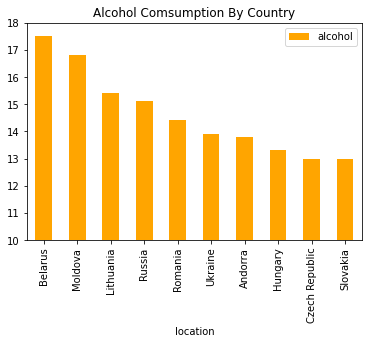

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv"

# Write your code below:
df = pd.read_csv(url)
display(df.head())


# Fill up the parameters
df.iloc[:10].plot(
    kind="bar",
    x="location", 
    y="alcohol", 
    color="orange", 
    title="Alcohol Comsumption By Country",
    ylim=(10, 18)
)

<a id="1.5.2"> <h4>1.5.2 Line Chart </h4></a>

_The line chart is represented by a series of datapoints connected with a straight line. Line charts are most often used to visualize data that changes over time._

**Example**

`Apple Stock Price Data` 

source: https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


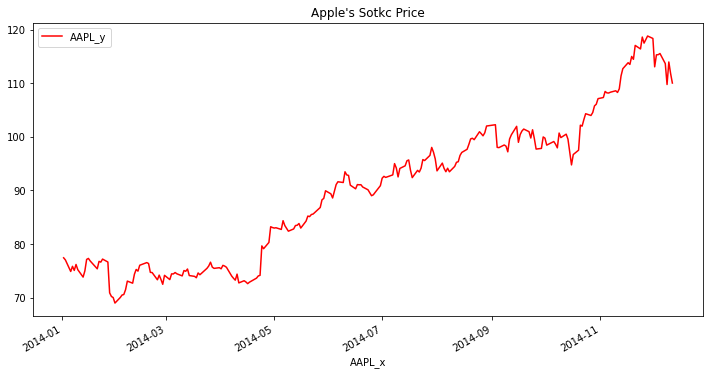

In [32]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv"

df = pd.read_csv(url)
display(df.head())

df['AAPL_x'] = pd.to_datetime(df['AAPL_x'])

# Write your code below:
df.plot(
    x="AAPL_x",
    y="AAPL_y",
    title="Apple's Sotkc Price",
    figsize=(12, 6),
    color="red"
)

<a id="1.5.3"> <h4>1.5.3 Scatterplot </h4></a>


_A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis._

**Example**
`Motor Cars Data`

source: https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


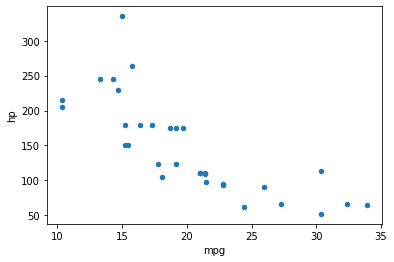

In [33]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv"

df = pd.read_csv(url)

display(df.head())

# Write your code below:
df.plot(
    kind="scatter",
    x="mpg",
    y="hp",
)


<a id="P2"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

The following `Dataframe` holds data of countries' **life expectancies** and **GDP**.

Investigate and visualise (with matplotlib) the relationship between any pair of these variables with an appropriate chart.

,country,life expectancy,GDP per capita,population,year
0,Algeria,72.301,6223.367465,33333216.0,2007
1,Angola,42.731,4797.231267,12420476.0,2007
2,Benin,56.728,1441.284873,8078314.0,2007
3,Botswana,50.728,12569.851770,1639131.0,2007
4,Burkina Faso,52.295,1217.032994,14326203.0,2007


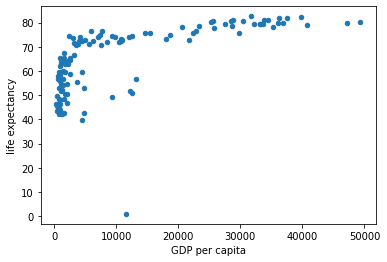

In [34]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/bubble_chart_tutorial.csv"

# Write your code below:
# Step 1: Read dataset
df = pd.read_csv(url)

# Step 2: Display the dataset
display(df.head())

# Step 3: Plot the scatterplot
df.plot(
    kind="scatter",
    x="GDP per capita",
    y="life expectancy",
)


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=25 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Airbnb Dataset </font> </h2></a>

<img src="http://www.stickpng.com/assets/images/580b57fcd9996e24bc43c513.png" width="400">
<br>
</br>
<br>
</br>

<b>Welcome to your final project of Hackwagon Academy DS101! You've come a long way since the start of this course and if you've been on track with our exercises, you should find this doable. </b>

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company does not own any lodging; it is merely a broker and receives percentage service fees (commissions) from both guests and hosts in conjunction with every booking. In this project, we aim to use algorithms and libraries to mine the reviews people have submitted on Singapore AirBnB rentals in order to provide descriptive analytics.

Start by reading the dataset:

In [35]:
# Write your code below:
df = pd.read_csv("airbnb_data.csv")
df.head()

,listing_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,1133718,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,9,4.5,12,1.0,NaN,74.0,NaN,2017-05-17 09:10:25.431659,1.293354,103.769226,0101000020E6100000E84EB0FF3AF159409C69C2F693B1...
1,3179080,1280,15295886,Shared room,NaN,Singapore,NaN,TS17,15,5.0,12,1.0,NaN,77.0,NaN,2017-05-17 09:10:24.216548,1.310862,103.858828,0101000020E6100000E738B709F7F659403F1BB96E4AF9...
2,15303457,1280,97053568,Shared room,NaN,Singapore,NaN,MK05,0,0.0,14,1.0,NaN,60.0,NaN,2017-05-17 09:10:16.969900,1.333744,103.764612,0101000020E610000044882B67EFF0594093C7D3F20357...
3,13902389,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,0,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.196321,1.294119,103.769178,0101000020E61000005FB35C363AF15940971DE21FB6B4...
4,13902391,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,1,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.170457,1.292766,103.768432,0101000020E6100000CB4C69FD2DF159407F17B6662BAF...


<h4> Q1. List out each neighborhoods and their number of listings <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Counting with dictionaries
</i>

<b>Expected Output:</b>

    When you search for ['TS17'], it should give you 342 counts.

In [37]:
# Write your code below:
num_listings = df["neighborhood"].value_counts()
num_listings["TS17"]

342

<h4> Q2. List out each neighborhood and their average overall_satisfaction <font color='red'>(5 marks)</font> </h4>

<b>Note: You should filter out listings whose reviews are 0. </b>

<i> Hint
1. Create dictionary where key is the neighborhood_id and value is a list of overall_satisfaction
2. Create another dictionary to compute the average
</i>

<b>Expected Output:</b>
    
    When you search for ['TS17'], it should give you an average score of 2.859447004608295.

In [38]:
# Write your code below:
listings_w_reviews = df[df["reviews"] > 0]
mean_scores = listings_w_reviews.groupby("neighborhood")["overall_satisfaction"].mean()
mean_scores["TS17"]

2.859447004608295

<h4> Q3. List out each neighborhood and their average price <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Similar to previous question
</i>

<b>Expected Output:</b>

    When you search for ['TS17'], it should give you an average price of 95.5672514619883.

In [39]:
# Write your code below:
avg_price = df.groupby("neighborhood")["price"].mean()
avg_price["TS17"]

95.5672514619883

<h4> Q4. Plot a distribution of counts of the overall_satisfaction <font color='red'>(5 marks)</font></h4>

<b>Note: You should filter out listings whose reviews are 0. </b>

<i> Hint
1. Counting with dictionaries
2. Get a list of tuples with `.items()`
3. Create 2 lists: 
    - 1 for all the scores labels
    - 1 for all the counts 
4. Plot with the 2 lists
</i>

<b>Expected Output:</b>

<img src="https://i.imgur.com/bj0ecjO.png" width="300">

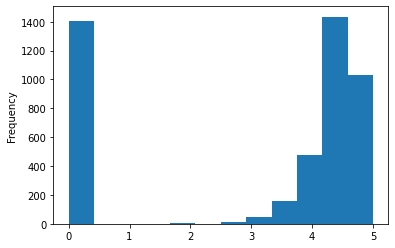

In [43]:
# Write your code below:
listing_w_reviews = df[df["reviews"] > 0]
listing_w_reviews["overall_satisfaction"].plot(kind="hist", bins=12)

<h4> Q5. Plot a geographical representation of all of the listings in Singapore <font color='red'>(5 marks)</font></h4>

<i> Hint
1. Create a list for latitude
2. Create a list for longitude
3. Append each listing's latitude and logitude to the lists
4. Plot a scatter plot using both lists
</i>

<b>Expected Output:</b>

<img src='https://i.imgur.com/9Dp5HrD.png' width="300">    

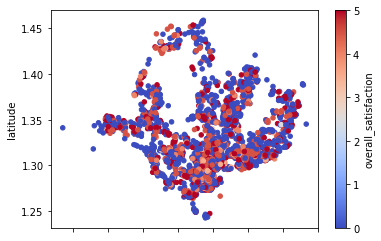

In [47]:
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    c="overall_satisfaction",
    colormap="coolwarm"
)

<a id="P3"><h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice III </font><font color="skyblue"> * </font></h2></a>


<img src="https://s.yimg.com/ny/api/res/1.2/_qLpCqbdgKq0nnY3UDmI2w--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9NzQ0O2g9Mzcy/http://media.zenfs.com/en/homerun/feed_manager_auto_publish_494/87db61c8ea6d6fcc4122595bb0c0c2c5" width="300">

This dataset has been source from the Lazada marketplace, where we have above <b>36 thousand rows</b> of data to work with. <b>Each row represents one product</b>. Opening this file in Microsoft Excel would look like this:

<img src="https://i.imgur.com/E0QJP92.png" width="500">

We're going to do some simple analysis with these products and see what we can come up with.

#### Read Dataset

In [48]:
# Write your code below:

df = pd.read_csv('lazada_data.csv')
df.head()

,country,sku_id,title,category_lvl_1,category_lvl_2,category_lvl_3,short_description,price,product_type
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,TV Audio / Video Gaming & Wearables,Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international
3,my,AN957HBAAAHDF4ANMY,ANMYNA Complaint Silky Set 柔顺洗发配套 (Shampoo 520...,Health & Beauty,Hair Care,Shampoos & Conditioners,<ul> <li>ANMYNA Complaint Silky Set (Shampoo 5...,118.00,local
4,my,AR511HBAXNWAANMY,Argital Argiltubo Green Clay For Face and Body...,Health & Beauty,Men's Care,Body and Skin Care,<ul> <li>100% Authentic</li> <li>Rrefresh and ...,114.80,international


<h3>Descriptive Analytics </h3>

#### Question 1
How many items are more than $50?

In [49]:
# Write your code below:

more_than_50 = df[df['price'] > 50]
len(more_than_50)

21135

#### Question 2
How many items are listed in <b>Singapore</b>, <b>Malaysia</b>, <b>Phillippines</b>?


In [50]:
# Write your code below:

df['country'].value_counts()

my    16413
ph    11232
sg     8638
Name: country, dtype: int64

#### Question 3

For the `category_1` of `Fashion`, how many items are for `Men` and how many items are for `Women`?

In [53]:
# Write your code below:

fashion_cond = df['category_lvl_1'] == "Fashion"
men_cond = df["category_lvl_2"] == "Men"
women_cond = df["category_lvl_2"] == "Women"

df_men = df[fashion_cond & men_cond]
df_women = df[fashion_cond & women_cond]

print(len(df_men))
print(len(df_women))

1609
3944


### Visualisation

####  Distribution of SG Category Level 1 Products

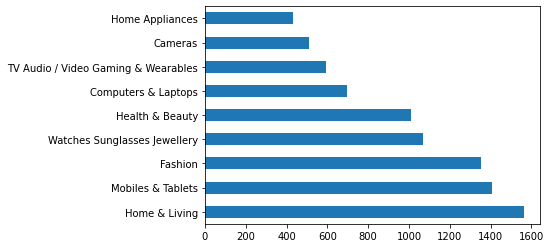

In [54]:
# Write your code below:

df_sg = df[df["country"] == 'sg']
df_sg['category_lvl_1'].value_counts().plot(kind='barh')

####  Distribution of MY Category Level 1 Products

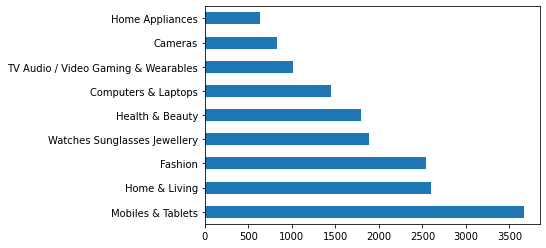

In [55]:
# Write your code below:

df_my = df[df["country"] == 'my']
df_my['category_lvl_1'].value_counts().plot(kind='barh')

####  Distribution of PH Category Level 1 Products

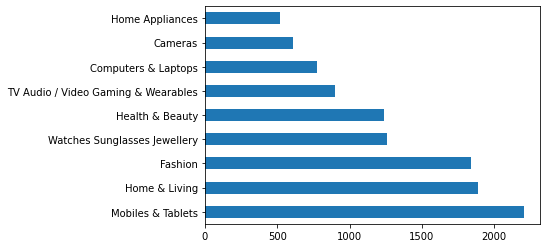

In [56]:
# Write your code below:

df_ph = df[df["country"] == 'ph']
df_ph['category_lvl_1'].value_counts().plot(kind='barh')